In [2]:
# Imports
# Numpy, Pandas for data manipulation; OS for input/output; MatPlotLib for plotting; Scikit-Learn
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [3]:
columns = ["c1s", "c1n", "c2s", "c2n", "c3s", "c3n", "c4s", "c4n", "c5s", "c5n", "r"]
poker_db_train = pd.read_csv('poker-hand-training-true.data', names=columns)
poker_db_test = pd.read_csv('poker-hand-testing.data', names=columns)

In [19]:
print(poker_db_train.columns)
print(poker_db_train.shape)
print(poker_db_test.columns)
print(poker_db_test.shape)

Index(['c1s', 'c1n', 'c2s', 'c2n', 'c3s', 'c3n', 'c4s', 'c4n', 'c5s', 'c5n',
       'r'],
      dtype='object')
(25010, 11)
Index(['c1s', 'c1n', 'c2s', 'c2n', 'c3s', 'c3n', 'c4s', 'c4n', 'c5s', 'c5n',
       'r'],
      dtype='object')
(1000000, 11)


In [ ]:
for i in poker_db_train.columns:
    print(poker_db_train[i].value_counts())

In [61]:
x_train = poker_db_train.drop('r', axis=1)
y_train= poker_db_train['r']
x_test = poker_db_test.drop('r', axis=1)
y_test = poker_db_test['r']

In [66]:
def knn1(x_train, y_train, x_test, y_test, max_n = 10):
    result = []
    for i in range(1, max_n):
        clf = KNeighborsClassifier(n_neighbors=i)
        clf.fit(x_train, y_train)
        result.append(clf.score(x_test.iloc[0:1000], y_test.iloc[0:1000]))
    return result

In [16]:
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=i, weights='distance')
    clf.fit(poker_db_train_x, poker_db_train_y)
    print(clf.score(poker_db_test_x.iloc[0:10000], poker_db_test_y.iloc[0:10000]))

0.5077
0.5205
0.5365
0.5486
0.5578
0.5605
0.5664
0.5705
0.5725
0.573


In [8]:
result = []
for i in range(1, 15):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(poker_db_train_x, poker_db_train_y)
    result.append(clf.score(poker_db_test_x.iloc[0:10000], poker_db_test_y.iloc[0:10000]))

Text(0, 0.5, 'Result')

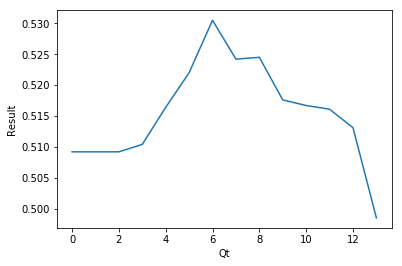

In [9]:
plt.plot(result)
plt.xlabel("Qt")
plt.ylabel("Result")

In [12]:
clf = tree.DecisionTreeClassifier(max_depth=6)
clf.fit(poker_db_train_x, poker_db_train_y)
prediction = clf.predict(poker_db_test_x)

In [30]:
print(poker_db_test_y.value_counts())
cm = confusion_matrix(poker_db_test_y, prediction)
for i in range(0, 10):
    print(cm[i][i]/cm[i].sum())

0    501209
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: r, dtype: int64
0.7138060170507712
0.37428579543571805
0.0004619713577758179
0.0030775057999147767
0.0
0.23446893787575152
0.0
0.0
0.0
0.0


In [59]:
# Add weights to the data, so that numbers and suits have different values
def weightTransform(r, df, w, col_list):
    if w != 1:
        for i in col_list:
            if w == 1:
                r[i] = df[i]
            else:
                r[i] = df[i].transform(lambda x: x*w)

def weightedData(df, w1=1, w2=1):
    r = df.copy()
    weightTransform(r, df, w1, ['c1n', 'c2n', 'c3n', 'c4n', 'c5n'])
    weightTransform(r, df, w2, ['c1s', 'c2s', 'c3s', 'c4s', 'c5s'])
    return r

In [57]:
weightedData(x_train, 1.15, 9.123).head()

,c1s,c1n,c2s,c2n,c3s,c3n,c4s,c4n,c5s,c5n
0,9.123,11.50,9.123,12.65,9.123,14.95,9.123,13.80,9.123,1.15
1,18.246,12.65,18.246,14.95,18.246,11.50,18.246,13.80,18.246,1.15
2,27.369,13.80,27.369,12.65,27.369,14.95,27.369,11.50,27.369,1.15
3,36.492,11.50,36.492,12.65,36.492,1.15,36.492,14.95,36.492,13.80
4,36.492,1.15,36.492,14.95,36.492,13.80,36.492,12.65,36.492,11.50


In [48]:
x_test_w = x_test.copy()
for i in ['c1n', 'c2n', 'c3n', 'c4n', 'c5n']:
    x_test_w[i] = x_test[i].transform(lambda x: x/13*20)
for i in ['c1s', 'c2s', 'c3s', 'c4s', 'c5s']:
    x_test_w[i] = x_test[i].transform(lambda x: x/4*5)
print(x_test_w.head())

    c1s        c1n   c2s        c2n   c3s        c3n   c4s        c4n   c5s  \
0  1.25   1.538462  1.25  20.000000  2.50   6.153846  2.50   4.615385  1.25   
1  3.75  18.461538  3.75   3.076923  3.75  16.923077  5.00   7.692308  2.50   
2  1.25  13.846154  5.00   9.230769  1.25   6.153846  3.75   3.076923  3.75   
3  1.25   6.153846  3.75  20.000000  2.50  20.000000  2.50   1.538462  3.75   
4  3.75  15.384615  2.50  10.769231  1.25   3.076923  2.50  16.923077  5.00   

         c5n  
0  18.461538  
1   7.692308  
2  13.846154  
3   9.230769  
4  13.846154  


[0.568, 0.594, 0.576, 0.576, 0.588, 0.586, 0.575, 0.589, 0.579]
[0.566, 0.598, 0.561, 0.575, 0.593, 0.587, 0.578, 0.58, 0.571]
[0.568, 0.6, 0.563, 0.569, 0.586, 0.584, 0.574, 0.577, 0.575]
[0.567, 0.6, 0.562, 0.568, 0.584, 0.583, 0.574, 0.577, 0.575]
[0.567, 0.6, 0.562, 0.568, 0.584, 0.583, 0.574, 0.577, 0.575]
[0.567, 0.6, 0.562, 0.568, 0.584, 0.583, 0.574, 0.577, 0.575]
[0.567, 0.6, 0.562, 0.568, 0.584, 0.583, 0.574, 0.577, 0.575]


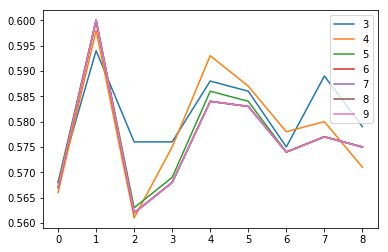

In [76]:
fig, ax = plt.subplots()
for w in range(3, 10):
    result = knn1(weightedData(x_train, w, 1), y_train, weightedData(x_test, w, 1), y_test)
    print(result)
    ax.plot(result, label=w)
ax.legend()

[0.568, 0.6, 0.563, 0.569, 0.586, 0.584, 0.574, 0.577, 0.575]


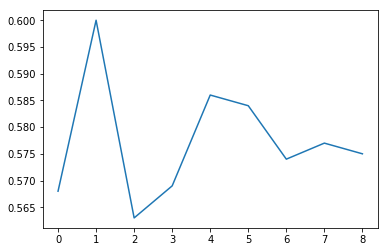

In [71]:
        result = knn1(weightedData(x_train, 5, 1), y_train, weightedData(x_test, 5, 1), y_test)
        print(result)
        plt.plot(result, label='asd')

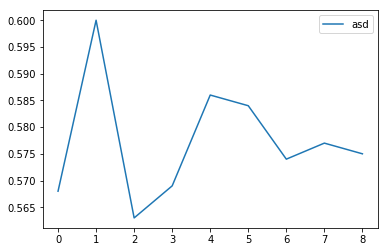

In [74]:
fig, ax = plt.subplots()
ax.plot(result, label="asd")

ax.legend()

In [49]:
knn1(x_train_w, y_train, x_test_w, y_test)

0.5154
0.5588
0.55
0.5671
0.5606
0.5712
0.5707
0.5797
0.5739


In [ ]:
1